In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy.io import netcdf
from sklearn.linear_model import LinearRegression

# just try
# second try

In [2]:
# import all temperature projections from 4 factors 
ssp245 = xr.open_dataarray('internal/ssp245_temperature.nc')
ssp245_novar = xr.open_dataarray('internal/ssp245_temperature_no_internal_variability.nc')
ssp245_covid = xr.open_dataarray('Covid/ssp245_temperature_covid.nc')
ssp245_ship = xr.open_dataarray('shipping/ssp245_temperature_shipping.nc')
ssp245_volcano = xr.open_dataarray('volcanic/ssp245_temperature_volcano.nc')



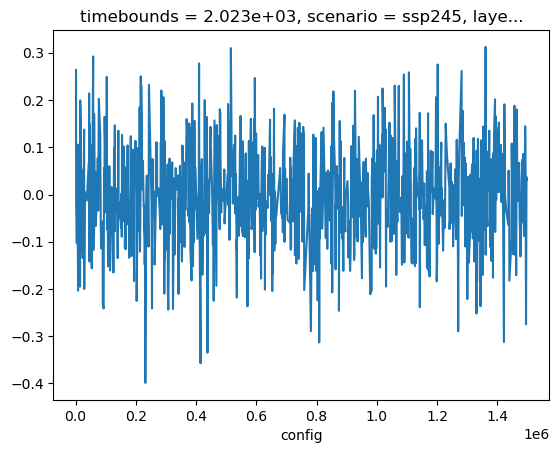

In [3]:
delta_iv = ssp245.loc[dict(timebounds=2023)]-ssp245_novar.loc[dict(timebounds=2023)]
delta_iv.plot()


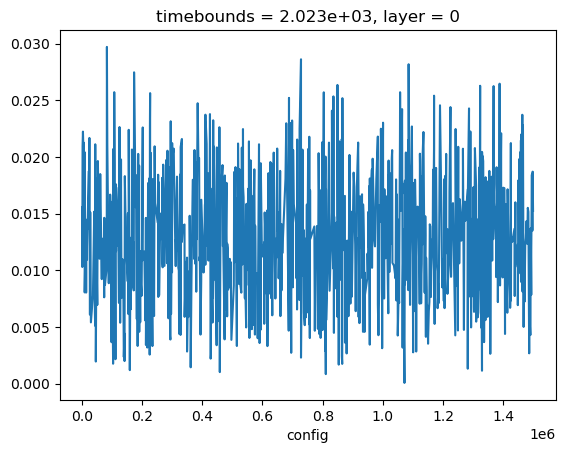

In [4]:
delta_ship = ssp245_ship.loc[dict(timebounds=2023)]-ssp245.loc[dict(timebounds=2023)]
delta_ship.plot()

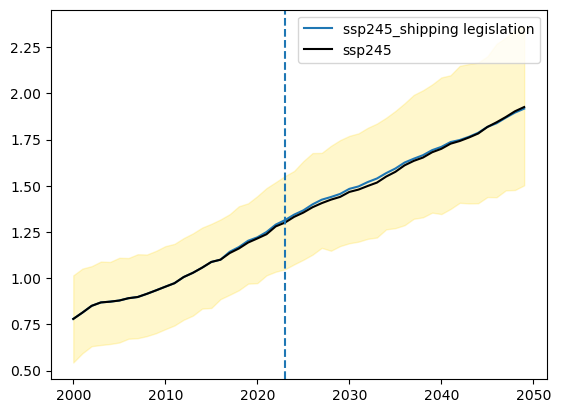

In [5]:
plt.plot(np.arange(2000,2050),ssp245_ship.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245_shipping legislation')
plt.plot(np.arange(2000,2050),ssp245.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245',c='k')
plt.legend()
time_range=np.arange(2000,2050)

plt.fill_between(np.arange(2000,2050),
                 ssp245_ship.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 ssp245_ship.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='gold',alpha=0.2,label='Sum of Differences: 5-95% percentile')
plt.axvline(2023,linestyle='--')

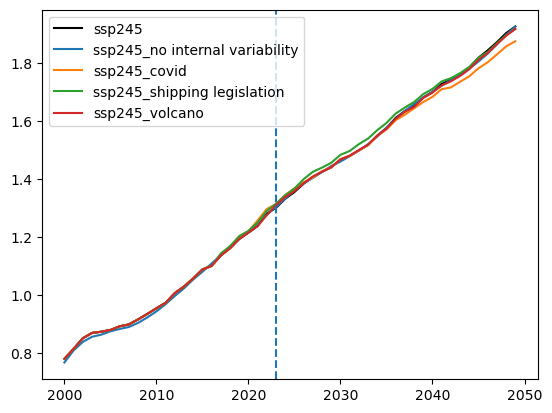

In [6]:
plt.plot(np.arange(2000,2050),ssp245.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245',c='k')
plt.plot(np.arange(2000,2050),ssp245_novar.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245_no internal variability')
plt.plot(np.arange(2000,2050),ssp245_covid.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245_covid')
plt.plot(np.arange(2000,2050),ssp245_ship.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245_shipping legislation')
plt.plot(np.arange(2000,2050),ssp245_volcano.loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),label='ssp245_volcano')

plt.legend()
plt.axvline(2023,linestyle='--')


Temperature projection with and without internal varibility is very weird, and for the 2023 porjected temperatures, the projected temperature with internal varibility is lower than the projected temperature without internal variability, which is inconsistent with our hypothesis. 

# Sum of all factors

2023 Projected temperature under ssp245: 1.3005948269030414
2023 Projected temperature under ssp245 with combined effects: 1.3362217953894782


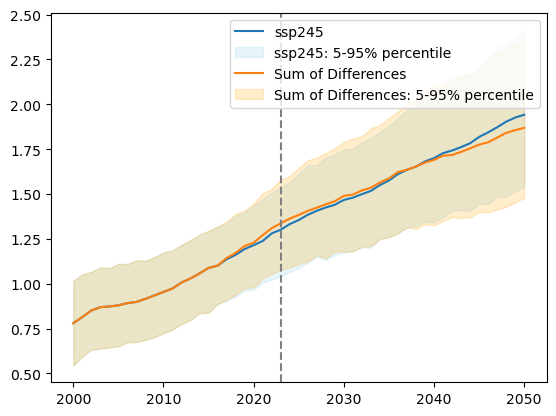

In [7]:
# calculate the climate impact, ssp245 as baseline
iv_effect = ssp245 - ssp245_novar
covid_effect = ssp245_covid - ssp245
ship_effect = ssp245_ship - ssp245
volcano_effect = ssp245_volcano - ssp245

# summing all configurations
alls_effect = covid_effect + ship_effect + volcano_effect
combined_effect = alls_effect+ssp245

time_range = np.arange(2000, 2051)

plt.plot(time_range, 
         ssp245.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='ssp245')
plt.fill_between(time_range,
                 ssp245.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 ssp245.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='skyblue',alpha=0.2,label='ssp245: 5-95% percentile')

plt.plot(time_range, 
         combined_effect.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='Sum of Differences')
plt.fill_between(time_range,
                 combined_effect.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 combined_effect.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='orange',alpha=0.2,label='Sum of Differences: 5-95% percentile')

plt.legend()
plt.axvline(2023,linestyle='--',c='grey')

print('2023 Projected temperature under ssp245:',ssp245.loc[dict(timebounds=2023)].median(dim='config').values)
print('2023 Projected temperature under ssp245 with combined effects:',combined_effect.loc[dict(timebounds=2023)].median(dim='config').values)


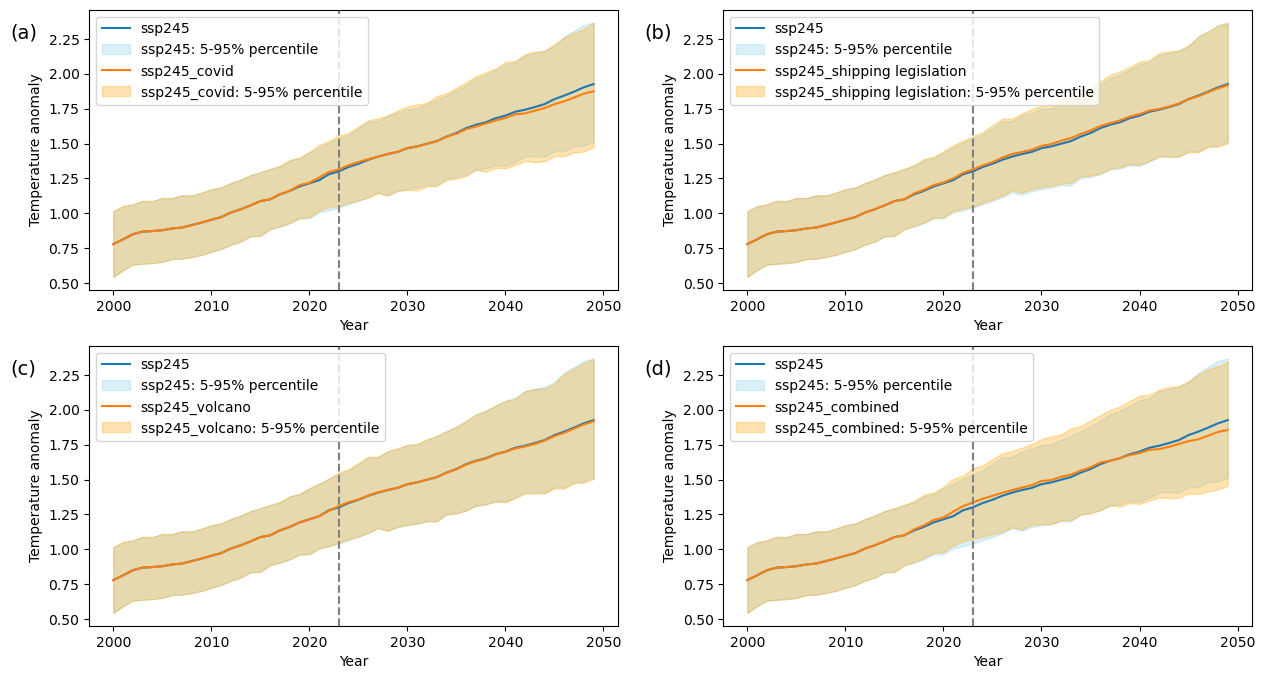

In [8]:
fig = plt.figure(figsize=(15,8))

datasets=[ssp245,ssp245_covid,ssp245_ship,ssp245_volcano,combined_effect]
labels=['ssp245','ssp245_covid','ssp245_shipping legislation','ssp245_volcano','ssp245_combined']

for i in np.arange(0,4):
    ax = fig.add_subplot(2,2,i+1)
    
    # base scenario ssp245
    ax.plot(np.arange(2000,2050),
            datasets[0].loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),
            label=labels[0])
    
    # 5-95% percentile for base scenario ssp245
    ax.fill_between(np.arange(2000,2050),
                    datasets[0].loc[dict(timebounds=np.arange(2000,2050))].quantile(0.05,dim='config'),
                    datasets[0].loc[dict(timebounds=np.arange(2000,2050))].quantile(0.95,dim='config'),
                    color='skyblue',alpha=0.3,label='ssp245: 5-95% percentile')
    
    # each scenario
    ax.plot(np.arange(2000,2050),
            datasets[i+1].loc[dict(timebounds=np.arange(2000,2050))].median(dim='config'),
            label=labels[i+1])
    
    # 5-95% percentile for each scenario
    ax.fill_between(np.arange(2000,2050),
                    datasets[i+1].loc[dict(timebounds=np.arange(2000,2050))].quantile(0.05,dim='config'),
                    datasets[i+1].loc[dict(timebounds=np.arange(2000,2050))].quantile(0.95,dim='config'),
                    color='orange',alpha=0.3,label=labels[i+1]+': 5-95% percentile'
                    )
    
    ax.axvline(2023,linestyle='--',c='grey')
    ax.legend(loc='upper left')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature anomaly')
    ax.text(-0.15, 0.95, f'({chr(97 + i)})', transform=ax.transAxes, fontsize=14, verticalalignment='top')

    

# fig.supxlabel('Year',fontsize=20)
# fig.supylabel('Temperature anomaly',fontsize=20)
# fig.tight_layout()

<xarray.DataArray (timebounds: 24)>
array([2026., 2028., 2029., 2030., 2031., 2032., 2033., 2034., 2035.,
       2036., 2037., 2038., 2039., 2040., 2041., 2042., 2043., 2044.,
       2045., 2046., 2047., 2048., 2049., 2050.])
Coordinates:
  * timebounds  (timebounds) float64 2.026e+03 2.028e+03 ... 2.049e+03 2.05e+03
    layer       int64 0


Text(0.5, 0, 'Year')

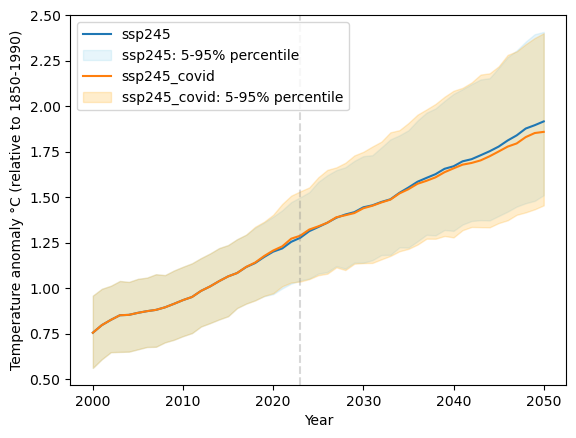

In [9]:
temp_ssp245_modified = ssp245 - ssp245[100:151].mean(dim='timebounds')
temp_covid_modified = ssp245_covid - ssp245_covid[100:151].mean(dim='timebounds')

# plt.figure(figsize=(8,6))
plt.plot(time_range, 
         temp_ssp245_modified.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='ssp245')
plt.fill_between(time_range,
                 temp_ssp245_modified.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 temp_ssp245_modified.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='skyblue',alpha=0.2,label='ssp245: 5-95% percentile')

plt.plot(time_range, 
         temp_covid_modified.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='ssp245_covid')
plt.fill_between(time_range,
                 temp_covid_modified.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 temp_covid_modified.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='orange',alpha=0.2,label='ssp245_covid: 5-95% percentile')

plt.legend(loc ="upper left")

# find the years when ssp245 exceed ssp245_covid
a=temp_ssp245_modified.loc[dict(timebounds=time_range)].median(dim='config')-temp_covid_modified.loc[dict(timebounds=time_range)].median(dim='config')
condition_met = xr.where(a > 0, a['timebounds'], np.nan)
years_where_ssp245_gt_covid = condition_met.dropna(dim='timebounds')
print(years_where_ssp245_gt_covid)

plt.axvline(x=2023, color='grey', linestyle='--',alpha=0.3)
# plt.axvline(x=2026, color='g', linestyle='--',alpha=0.3)
# plt.axvline(x=2030, color='r', linestyle='--',alpha=0.3)



plt.ylabel('Temperature anomaly \N{DEGREE SIGN}C (relative to 1850-1990)')
plt.xlabel('Year')


# Readjust the baseline period in FaIR

Slope (decadal warming rate-HadCruT5): [0.24489966]
Slope (decadal warming rate): [0.19470132]


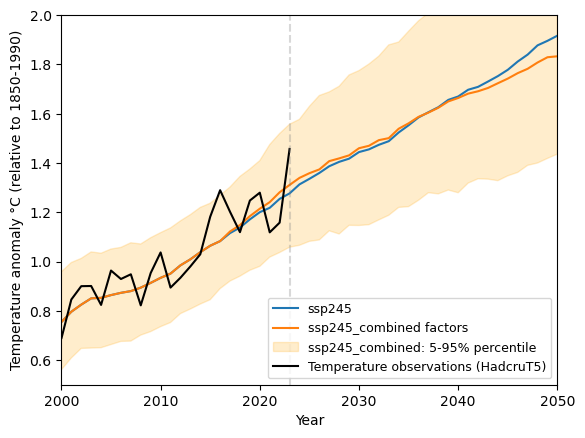

In [10]:
# shift to a zero baseline of period 1850-1900 

# ssp245's temperature projection
# 1850 - 1750 = 100
# 1900 - 1750 = 240+1 = 241 (to include 1990)
temp_ssp245_modified = ssp245 - ssp245[100:151].mean(dim='timebounds')
temp_combined_modified = combined_effect - combined_effect[100:151].mean(dim='timebounds')

# plt.figure(figsize=(8,6))
plt.plot(time_range, 
         temp_ssp245_modified.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='ssp245')
# plt.fill_between(time_range,
#                  temp_ssp245_modified.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
#                  temp_ssp245_modified.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
#                  color='skyblue',alpha=0.2,label='ssp245: 5-95% percentile')

plt.plot(time_range, 
         temp_combined_modified.loc[dict(timebounds=time_range)].median(dim='config'), 
         label='ssp245_combined factors')
plt.fill_between(time_range,
                 temp_combined_modified.loc[dict(timebounds=time_range)].quantile(0.05,dim='config'),
                 temp_combined_modified.loc[dict(timebounds=time_range)].quantile(0.95,dim='config'),
                 color='orange',alpha=0.2,label='ssp245_combined: 5-95% percentile')

# plot the best-fit line with regression from 1970
fut_proj = pd.DataFrame({
    'year': np.arange(2023, 2051, 1),
    'projected': temp_combined_modified.loc[dict(timebounds=np.arange(2023, 2051))].median(dim='config').values
})

x1 = fut_proj['year'].values.reshape(-1,1)#reshape for sklearn
model1 = LinearRegression().fit(x1,fut_proj['projected'])
prediction1 = model1.predict(x1)
# plt.plot(fut_proj['year'],prediction1,'--',color='b',label='Linear warming trend (FaIR)')



# HadCRUST5
temp = pd.read_csv('/Users/yongyao/Mres_Project/Temperature_trend_2023/HadCRUT.5.0.2.0.analysis.summary_series.global.annual.csv',usecols=['Time','Anomaly (deg C)'])
temp = temp[temp['Time']<=2023]

# time baseline used in Hadcrust5
temp_base = temp[(temp['Time']>=1961) & (temp['Time']<=1990)]
temp_raw = temp + temp_base['Anomaly (deg C)'].mean()

# 1900-1850=50+1=51 (new time baseline)
temp['adjusted anomaly'] = temp_raw['Anomaly (deg C)'] - temp_raw['Anomaly (deg C)'][:51].mean()
plt.plot(temp['Time'],temp['adjusted anomaly'],label='Temperature observations (HadcruT5)',c='k')

# plot the best-fit line with regression from 2004 from observation
temp_2004 = temp.loc[temp['Time']>=2004]
x = temp_2004['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,temp_2004['adjusted anomaly'])
prediction = model.predict(x)
# plt.plot(temp_2004['Time'],prediction,'--',color='k',label='Linear warming trend (HadcruT5)')
# plt.scatter(2022,1.1578)

plt.legend(loc='lower right',fontsize=9)
plt.xlabel('Year')
plt.ylabel('Temperature anomaly \N{DEGREE SIGN}C (relative to 1850-1990)')
plt.xlim(2000,2050)
plt.ylim(0.5,2.0)
plt.axvline(x=2023, color='grey', linestyle='--',alpha=0.3)
print(f'Slope (decadal warming rate-HadCruT5): {model.coef_*10}')
print(f'Slope (decadal warming rate): {model1.coef_*10}')


In [11]:
a = temp_combined_modified.loc[dict(timebounds=time_range)].quantile(0.95,dim='config').to_numpy
temp_combined_modified.loc[dict(timebounds=np.arange(2023, 2051))].median(dim='config').values

array([1.31074289, 1.3394111 , 1.3584694 , 1.37374697, 1.40741035,
       1.4185487 , 1.43090455, 1.45985487, 1.46969006, 1.49259357,
       1.50074936, 1.53887731, 1.56087619, 1.58708754, 1.60446257,
       1.62410193, 1.64965731, 1.66373228, 1.68134422, 1.69098789,
       1.70433168, 1.72357763, 1.74240194, 1.76452998, 1.78219487,
       1.80771155, 1.82905744, 1.83292031])

In [12]:
# 5th and 95th percentile - warming rate
x1 = fut_proj['year'].values.reshape(-1,1)#reshape for sklearn
model_u = LinearRegression().fit(x1,
                                 temp_combined_modified.loc[dict(timebounds=np.arange(2023, 2051))].quantile(0.95,dim='config').values)
prediction_u = model_u.predict(x1)
print(model_u.coef_*10)

model_l = LinearRegression().fit(x1,
                                 temp_combined_modified.loc[dict(timebounds=np.arange(2023, 2051))].quantile(0.05,dim='config').values)
prediction_l = model_l.predict(x1)
print(model_l.coef_*10)

[0.30510176]
[0.13938265]


In [13]:
a = temp_combined_modified.median(dim='config')-temp_ssp245_modified.median(dim='config')
a.idxmax(dim='timebounds')

<xarray.DataArray 'timebounds' ()>
array(2023.)
Coordinates:
    layer     int64 0
    scenario  <U6 'ssp245'

In [14]:
a=temp_combined_modified.loc[dict(timebounds=np.arange(2023,2051))].median(dim='config')
b=temp_ssp245_modified.loc[dict(timebounds=np.arange(2023,2051))].median(dim='config')
d=(a-b)

negative_values = d < 0

# Find the index of the first negative value
first_negative_index = negative_values.idxmax(dim='timebounds')
print('the year when warming effect dominates the collong effect is: ',first_negative_index)





the year when warming effect dominates the collong effect is:  <xarray.DataArray 'timebounds' ()>
array(2037.)
Coordinates:
    layer     int64 0
    scenario  <U6 'ssp245'


In [15]:
print('2023 Projected temperature under ssp245:',temp_ssp245_modified.loc[dict(timebounds=2023)].median(dim='config').values)
print('2023 Projected temperature under ssp245 with combined effects:',temp_combined_modified.loc[dict(timebounds=2023)].median(dim='config').values)
print('2023 Actual temperature anomaly:',temp['adjusted anomaly'].iloc[-1])



2023 Projected temperature under ssp245: 1.2764131191608452
2023 Projected temperature under ssp245 with combined effects: 1.3107428924833888
2023 Actual temperature anomaly: 1.4568074408235292


In [16]:
# black-organe: how much it explains by internal varibility
bmo_2023 = temp.loc[temp['Time']==2023,'adjusted anomaly'].item() - temp_combined_modified.loc[dict(timebounds=2023)].median(dim='config')

# 0.198 - (orange - blue): internal varibility
intvar = 0.198 - (temp_combined_modified.loc[dict(timebounds=np.arange(1970,2051))]-temp_ssp245_modified.loc[dict(timebounds=np.arange(1970,2051))])
intvar_2023 = 0.198 - (temp_combined_modified.loc[dict(timebounds=2023)].median(dim='config') - temp_ssp245_modified.loc[dict(timebounds=2023)].median(dim='config'))

print('black-orange in 2023: ', bmo_2023.values)
print('expected impact of internal variability in 2023: ', intvar_2023.values)
print('temperature raise from external forcings: ',temp_combined_modified.loc[dict(timebounds=2023)].median(dim='config').values-temp_ssp245_modified.loc[dict(timebounds=2023)].median(dim='config').values)




black-orange in 2023:  0.14606454834014038
expected impact of internal variability in 2023:  0.1636702266774564
temperature raise from external forcings:  0.03432977332254361


Text(0, 0.5, 'Frequency')

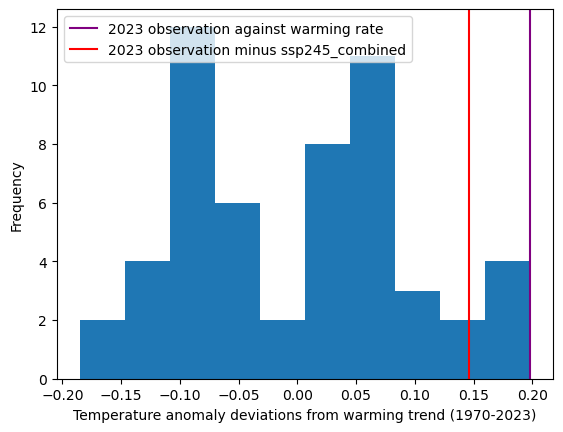

In [17]:
temp_1970 = temp[temp['Time'] >= 1970]


# plot the best-fit line with regression from 1970
x = temp_1970['Time'].values.reshape(-1,1)#reshape for sklearn
model = LinearRegression().fit(x,temp_1970['adjusted anomaly'])
prediction = model.predict(x)

# plt.plot(temp_1970['Time'],temp_1970['adjusted anomaly'])
# plt.plot(temp_1970['Time'],prediction,'--',color='k')

deviations = temp_1970['adjusted anomaly']-prediction

# plt.plot(temp_1970['Time'],deviations)

plt.hist(deviations)
plt.axvline(x = deviations.iloc[-1],color='purple',label='2023 observation against warming rate')
plt.axvline(x = bmo_2023.values,color='red',label='2023 observation minus ssp245_combined')
# plt.axvline(x = 0.1657,color='orange',label='2023 climate impact from internal variability')
plt.legend()
plt.xlabel('Temperature anomaly deviations from warming trend (1970-2023)')
plt.ylabel('Frequency')


## Attributions

{'Internal varibilities': 82.56405938244473, 'Volcanic eurption': 6.124355792171718, 'COVID-19': 4.236353083067422, 'Shipping legislation': 7.0752317423161255}


array(0.01251683)

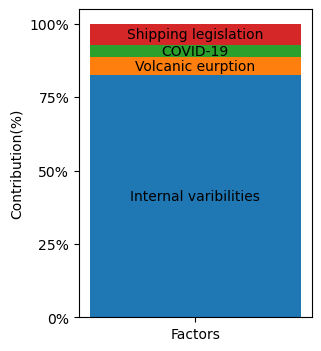

In [18]:
iv2023 = bmo_2023.values
covid2023= covid_effect.loc[dict(timebounds=2023)].median(dim='config').values
ship2023= ship_effect.loc[dict(timebounds=2023)].median(dim='config').values
volcano2023= volcano_effect.loc[dict(timebounds=2023)].median(dim='config').values
all_effect_2023 = iv2023+covid2023+volcano2023+ship2023
# a=covid2023+volcano2023+ship2023

factors=('Internal varibilities','Volcanic eurption','COVID-19','Shipping legislation')
impacts=[iv2023,volcano2023,covid2023,ship2023]
percentage={}

bottom=0
plt.figure(figsize=(3,4))

for factor, impact in zip(factors,impacts):
    perc = (impact/all_effect_2023)*100
    percentage[factor]=perc
    
    # plot
    plt.bar('Factors',perc,bottom=bottom,label=factor)
    plt.text(0,bottom+perc/2,factor,color='k',ha='center',va='center')
    bottom += perc


plt.yticks([0,25,50,75,100],['0%','25%','50%','75%','100%'])
plt.ylabel('Contribution(%)')


intvar = temp.loc[temp['Time']==2023,'adjusted anomaly'].item() - temp_combined_modified.loc[dict(timebounds=2023)]

print(percentage)
ship2023

In [19]:
# Covid
low_covid=covid_effect.loc[dict(timebounds=2023)].quantile(0.05,dim='config').values
upp_covid=covid_effect.loc[dict(timebounds=2023)].quantile(0.95,dim='config').values
median_covid=covid_effect.loc[dict(timebounds=2023)].median(dim='config').values
print('low_covid: ',low_covid)
print('median_covid: ',median_covid)
print('upper_covid: ',upp_covid)
print(median_covid/all_effect_2023*100)
print('')

#Volcanic
low_vol=volcano_effect.loc[dict(timebounds=2023)].quantile(0.05,dim='config').values
upp_vol=volcano_effect.loc[dict(timebounds=2023)].quantile(0.95,dim='config').values
median_vol=volcano_effect.loc[dict(timebounds=2023)].median(dim='config').values

# shippping
low_ship=ship_effect.loc[dict(timebounds=2023)].quantile(0.05,dim='config').values
upp_ship=ship_effect.loc[dict(timebounds=2023)].quantile(0.95,dim='config').values
median_ship=ship_effect.loc[dict(timebounds=2023)].median(dim='config').values
print('low_ship: ',low_ship)
print('median_ship: ',median_ship)
print('upper_ship: ',upp_ship)
print(median_ship/all_effect_2023*100)
print('')
print('median_vol: ',median_vol)
print('low_vol: ',low_vol)
print('upper_vol: ',upp_vol)

# internal varibility
low_iv=iv_effect.loc[dict(timebounds=2023)].quantile(0.05,dim='config').values
upp_iv=iv_effect.loc[dict(timebounds=2023)].quantile(0.95,dim='config').values
median_iv=iv_effect.loc[dict(timebounds=2023)].median(dim='config').values

0.012516832827419888*20

low_covid:  -0.030759553433443276
median_covid:  0.007494556400398755
upper_covid:  0.08637762339260924
4.236353083067422

low_ship:  0.0040452156377135395
median_ship:  0.012516832827419888
upper_ship:  0.021787389670793633
7.0752317423161255

median_vol:  0.010834632760899465
low_vol:  0.004992049586143743
upper_vol:  0.01739635054189126


0.25033665654839776

The reason of shipping legislation uncertainty so small: the uncertainty is calculated with the ssp245_shipping minus the ssp245 temperature projection, which is also consistent with the above graph that 5-95% percentile of ssp245 and ssp245_ship is nearly the same.


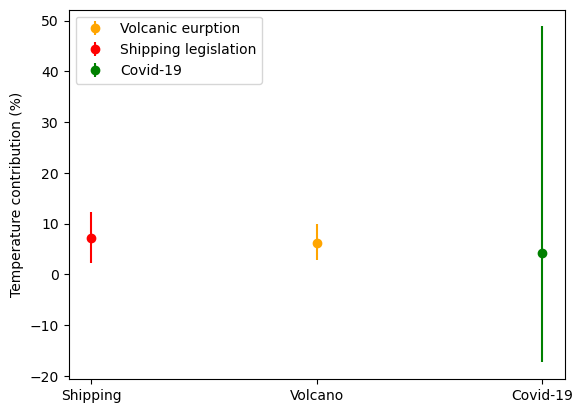

In [20]:

plt.errorbar(1,percentage['Volcanic eurption'],
             yerr=[[(median_vol-low_vol)/all_effect_2023*100], 
                   [(upp_vol-median_vol)/all_effect_2023*100]],
             fmt='o',color='orange',label='Volcanic eurption')
                        
plt.errorbar(0,percentage['Shipping legislation'],
             yerr=[[(median_ship-low_ship)/all_effect_2023*100], 
                   [(upp_ship-median_ship)/all_effect_2023*100]],
             fmt='o',color='red',label='Shipping legislation')

plt.errorbar(2,percentage['COVID-19'],
             yerr=[[(median_covid-(low_covid))/all_effect_2023*100], 
                   [(upp_covid-median_covid)/all_effect_2023*100]],
             fmt='o',color='green',label='Covid-19')

plt.legend(loc='upper left')
plt.ylabel('Temperature contribution (%)')
plt.xticks([0, 1, 2], ['Shipping', 'Volcano', 'Covid-19'])


print('The reason of shipping legislation uncertainty so small: the uncertainty is calculated with the ssp245_shipping minus the ssp245 temperature projection, which is also consistent with the above graph that 5-95% percentile of ssp245 and ssp245_ship is nearly the same.')

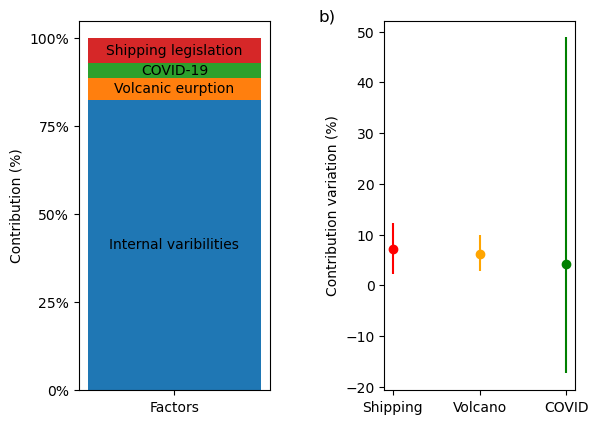

In [21]:
fig, axs = plt.subplots(1, 2)  # 1 row, 2 columns

# bar chart
bottom = 0
for factor, impact in zip(factors, impacts):
    perc = (impact / all_effect_2023) * 100
    percentage[factor] = perc
    
    axs[0].bar('Factors', perc, bottom=bottom, label=factor)
    axs[0].text(0, bottom + perc / 2, factor, color='k', ha='center', va='center')
    bottom += perc
axs[0].set_yticks([0, 25, 50, 75, 100])
axs[0].set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
axs[0].set_ylabel('Contribution (%)')


# Error bars
axs[1].errorbar(1, percentage['Volcanic eurption'],
                yerr=[[(median_vol - low_vol) / all_effect_2023 * 100], 
                      [(upp_vol - median_vol) / all_effect_2023 * 100]],
                fmt='o', color='orange', label='Volcanic eruption')

axs[1].errorbar(0, percentage['Shipping legislation'],
                yerr=[[(median_ship - low_ship) / all_effect_2023 * 100], 
                      [(upp_ship - median_ship) / all_effect_2023 * 100]],
                fmt='o', color='red', label='Shipping')

axs[1].errorbar(2, percentage['COVID-19'],
                yerr=[[(median_covid - low_covid) / all_effect_2023 * 100], 
                      [(upp_covid - median_covid) / all_effect_2023 * 100]],
                fmt='o', color='green', label='COVID-19')

axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Shipping', 'Volcano', 'COVID'])
axs[1].set_ylabel('Contribution variation (%)')


plt.subplots_adjust(wspace=0.6)
# axs[0].annotate('a)', xy=(-0.3, 1.01), xycoords='axes fraction', fontsize=12, ha='center', va='center')
axs[1].annotate('b)', xy=(-0.3, 1.01), xycoords='axes fraction', fontsize=12, ha='center', va='center')


# Show plot
plt.show()

([<matplotlib.axis.XTick at 0x159181090>,
 [Text(0, 0, 'Covid-19'),
  Text(1, 0, 'Shipping'),
  Text(2, 0, 'Volcano'),
  Text(3, 0, 'Internal variability')])

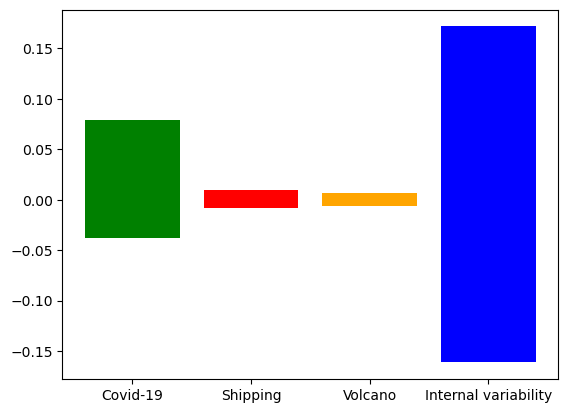

In [22]:
low_covid-median_covid
upp_covid-median_covid
plt.bar(0,[low_covid-median_covid,upp_covid-median_covid],color='green',label='Covid-19')
plt.bar(1,[low_ship-median_ship,upp_ship-median_ship],color='red',label='Shipping legislation')
plt.bar(2,[low_vol-median_vol,upp_vol-median_vol],color='orange',label='Volcanic eurption')
plt.bar(3,[low_iv-median_iv,upp_iv-median_iv],color='blue',label='Internal varibility')
plt.xticks([0, 1, 2, 3], ['Covid-19', 'Shipping', 'Volcano', 'Internal variability'])


Text(0, 0.5, 'Temperature Contributions (°C)')

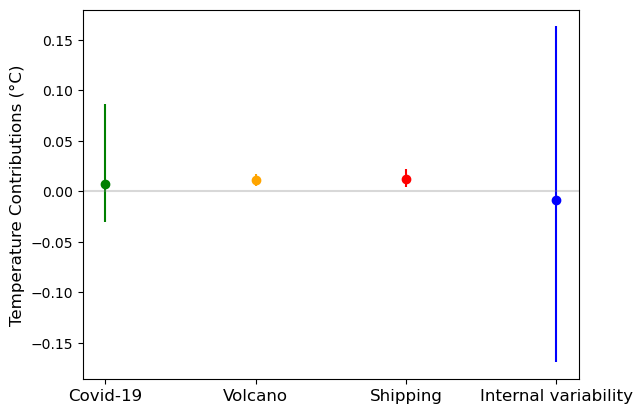

In [23]:
plt.errorbar(0,median_covid,
             yerr=[[(median_covid-(low_covid))], 
                   [(upp_covid-median_covid)]],
             fmt='o',color='green',label='Covid-19')

plt.errorbar(1,median_vol,
             yerr=[[(median_vol-low_vol)], 
                   [(upp_vol-median_vol)]],
             fmt='o',color='orange',label='Volcanic eurption')
                        
plt.errorbar(2,median_ship,
             yerr=[[(median_ship-low_ship)], 
                   [(upp_ship-median_ship)]],
             fmt='o',color='red',label='Shipping legislation')

plt.errorbar(3,median_iv,
             yerr=[[(median_iv-low_iv)], 
                   [(upp_iv-median_iv)]],
             fmt='o',color='blue',label='Interna Variability')
plt.axhline(y=0, color='grey', linestyle='-',alpha=0.3)


plt.xticks([0, 1, 2, 3], ['Covid-19', 'Volcano', 'Shipping', 'Internal variability'],fontsize=12)
plt.ylabel('Temperature Contributions (\N{DEGREE SIGN}C)',fontsize=12)

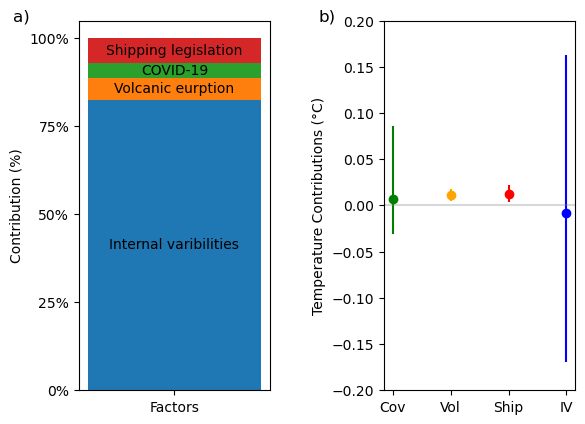

In [24]:
fig, axs = plt.subplots(1, 2)  # 1 row, 2 columns

# bar chart
bottom = 0
for factor, impact in zip(factors, impacts):
    perc = (impact / all_effect_2023) * 100
    percentage[factor] = perc
    
    axs[0].bar('Factors', perc, bottom=bottom, label=factor)
    axs[0].text(0, bottom + perc / 2, factor, color='k', ha='center', va='center')
    bottom += perc
axs[0].set_yticks([0, 25, 50, 75, 100])
axs[0].set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
axs[0].set_ylabel('Contribution (%)')


# Error bars
axs[1].errorbar(0,median_covid,
             yerr=[[(median_covid-(low_covid))], 
                   [(upp_covid-median_covid)]],
             fmt='o',color='green',label='Covid-19')

axs[1].errorbar(1,median_vol,
             yerr=[[(median_vol-low_vol)], 
                   [(upp_vol-median_vol)]],
             fmt='o',color='orange',label='Volcanic eurption')
                        
axs[1].errorbar(2,median_ship,
             yerr=[[(median_ship-low_ship)], 
                   [(upp_ship-median_ship)]],
             fmt='o',color='red',label='Shipping legislation')

axs[1].errorbar(3,median_iv,
             yerr=[[(median_iv-low_iv)], 
                   [(upp_iv-median_iv)]],
             fmt='o',color='blue',label='Interna Variability')
axs[1].axhline(y=0, color='grey', linestyle='-',alpha=0.3)



axs[1].set_xticks([0, 1, 2, 3], ['Cov', 'Vol', 'Ship', 'IV'],fontsize=10)
axs[1].set_ylabel('Temperature Contributions (\N{DEGREE SIGN}C)',fontsize=10)
axs[1].set_ylim([-0.2, 0.2])


plt.subplots_adjust(wspace=0.6)
axs[0].annotate('a)', xy=(-0.3, 1.01), xycoords='axes fraction', fontsize=12, ha='center', va='center')
axs[1].annotate('b)', xy=(-0.3, 1.01), xycoords='axes fraction', fontsize=12, ha='center', va='center')


# Show plot
plt.show()

In [25]:
print(median_iv)
print(median_iv-low_iv)
print(upp_iv-median_iv)


-0.008212098588873618
0.16121175642029562
0.1715763840008826


(array([ 28.,  91., 139., 195., 194., 157., 118.,  55.,  20.,   4.]),
 array([7.15639574e-05, 3.03552669e-03, 5.99948942e-03, 8.96345215e-03,
        1.19274149e-02, 1.48913776e-02, 1.78553403e-02, 2.08193031e-02,
        2.37832658e-02, 2.67472285e-02, 2.97111913e-02]),
 <BarContainer object of 10 artists>)

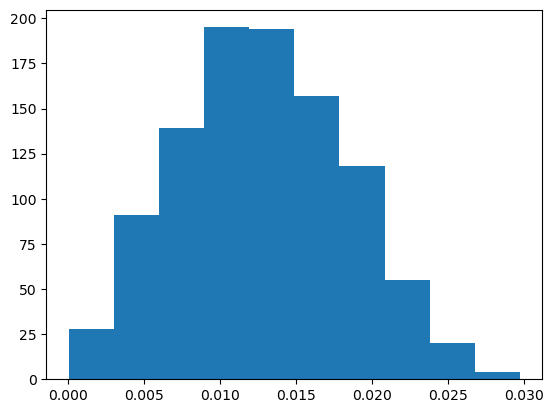

In [26]:
plt.hist(ssp245_ship.sel(timebounds=2023) - ssp245.sel(timebounds=2023))

(array([ 36., 105., 211., 300., 190., 103.,  41.,  12.,   0.,   3.]),
 array([0.00217087, 0.00465627, 0.00714166, 0.00962705, 0.01211245,
        0.01459784, 0.01708323, 0.01956862, 0.02205402, 0.02453941,
        0.0270248 ]),
 <BarContainer object of 10 artists>)

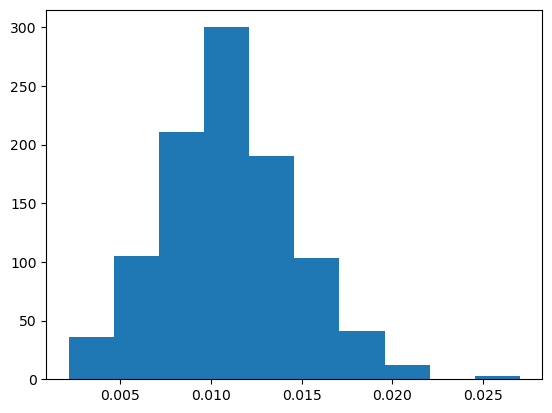

In [27]:
plt.hist(ssp245_volcano.sel(timebounds=2023) - ssp245.sel(timebounds=2023))